# Import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Loading the data

### It is recommended to upload the zipped EMNIST dataset to your Google Drive.

### Then, mount Google Drive and import the dataset (by executing the following code).

In [3]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Unzipping .zip dataset file from drive to /content folder of your colab notebook

import shutil
import zipfile

zip_file_path = '/content/drive/MyDrive/A_Z Handwritten Data.zip' # Change as per your dataset file path in drive
extracted_dir = '/content'

import os
os.makedirs(extracted_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)


In [5]:
data = pd.read_csv('A_Z Handwritten Data.csv')

# Display this dataset
print(data)
# It's first column contains all the labels (o to 25 for A to Z) and the remaining 784 columns contain pixel values.
# Convert these to numpy arrays
data = data.to_numpy()

         0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0        0    0    0    0    0    0    0    0    0    0  ...      0      0   
1        0    0    0    0    0    0    0    0    0    0  ...      0      0   
2        0    0    0    0    0    0    0    0    0    0  ...      0      0   
3        0    0    0    0    0    0    0    0    0    0  ...      0      0   
4        0    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
372445  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372446  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372447  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372448  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372449  25    0    0    0    0    0    0    0    0    0  ...      0      0   

        0.641  0.642  0.643  0.644  0.645  0.646  0.647  0.648 

In [6]:
# As you can see, this dataset is sorted from A to Z, it needs to be shuffled before it can be used for training
# Shuffle the dataset
np.random.shuffle(data)
print(data)
# Seperate them accordingly as X (for pixel values) and Y (for labels)
X = data[:, 1:]
Y = data[:, 0].reshape((-1, ))
# Normalize the X array (X/255), normalizing by 255 scales pixel values to a range between 0 and 1, promoting numerical stability, consistent scale across features, and optimizing the sensitivity of activation functions during neural network training.
X = X/255
nDiv = 30
# Create training and validation sets
X_train = X[:300000, :].reshape(nDiv, 300000//nDiv, -1)
X_val = X[300000:310000, :]
X_test = X[310000:, :]
Y_train = Y[:300000].reshape(nDiv, 300000//nDiv)
Y_val = Y[300000:310000]
Y_test = Y[310000:]
X_train.shape

[[ 3  0  0 ...  0  0  0]
 [13  0  0 ...  0  0  0]
 [24  0  0 ...  0  0  0]
 ...
 [14  0  0 ...  0  0  0]
 [20  0  0 ...  0  0  0]
 [18  0  0 ...  0  0  0]]


(30, 10000, 784)

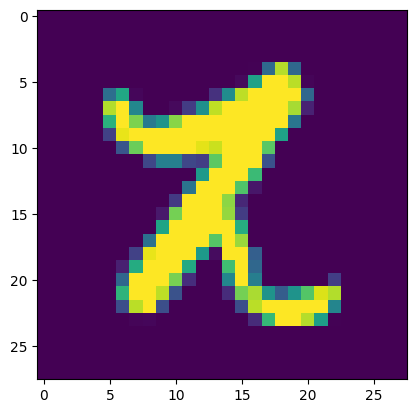

In [7]:
# Display a single training set sample along with its label using matplot heatmap
dataSample = X_train[np.random.randint(nDiv)][np.random.randint(300000/nDiv), :].reshape(28, 28)
plt.imshow(dataSample)
plt.show()

# Model

In [10]:
# You can copy-paste your MNIST model and make necessary changes to train the model on EMNIST
# Changes would include : Shapes of weight matrices, no. of output nodes and return vector of one_hot function
# Note that you might need to increase number of nodes in the hidden layers too to accomodate for the additional output information compared to MNIST
# Experiment with these numbers and find the optimal number of nodes for each layer

# We'll be making a model with 2 hidden layers with sigmoid activations

i = 784 # Input size (no. of pixels = 28*28 = 784)
h1 = 420 # Choose a reasonable no. of nodes for 1st hidden layer
h2 = 250 # Choose a reasonable no. of nodes for 2nd hidden layer
o = 26 # Output size (no. of digits to classify)
lr = 0.1 # Choose a reasonable learning rate
epochs = 60 # Choose a reasonable no. of epochs

# Initialize the weights and biases (Generally, we follow the convention that weights are drawn from a standard normal distribution, while the bias vectors are initialized to zero.)

# Initialize W1 W2 W3
W1 = np.random.normal(0, 0.5, size = (h1, i))
W2 = np.random.normal(0, 0.5, size = (h2, h1))
W3 = np.random.normal(0, 0.5, size = (o, h2))

# Initialize b1 b2 b3
b1 = np.zeros((h1, 1))
b2 = np.zeros((h2, 1))
b3 = np.zeros((o, 1))

# Defining Activation Functions

def sigmoid(z) :
    return 1/(1 + np.exp(-z))

def sigmoidprime(z) :
    return ((sigmoid(z))**2)*(np.exp(-z))
    # Returns derivative of sigmoid function of z

def one_hot(y,bs) :
    # One-hot encoding is a method used in machine learning to represent categorical data, such as different classes or categories, as binary vectors.
    # In this encoding, each category is assigned a unique binary value, where only one bit is set to 1 (hot), and the rest are set to 0.
    # This creates a binary vector with a length equal to the number of categories, and it helps machine learning algorithms better understand and process categorical information.

    # Let's consider a simple example with three categories: "Red," "Blue," and "Green." In one-hot encoding:
    # "Red" might be represented as [1, 0, 0]
    # "Blue" might be represented as [0, 1, 0]
    # "Green" might be represented as [0, 0, 1]

    # Fill in this function to return the one hot encoded values for digits 0 to 9
    onehot = np.zeros((bs, 1))
    onehot[y, 0] = 1
    return onehot

# Before we start with the training loop. Lets create 2 empty lists to store the cost and accuracy values at the end of each epoch
cost = []
accuracy = []

# Training Loop
for ep in range(epochs):
    c_temp = 0
    pBar = 50
    print(f"Epoch {ep+1}")
    print("")
    print(("Training:" + " "*(pBar - 10) + "|"))
    for i in range(len(X_train[ep%nDiv])):

        # Forward Propagation
        # Carry out the forward propagation matrices calculations for z1, a1, z2, a2, z3 and y_predicted

        inp = X_train[ep%nDiv][i].reshape(784, 1)
        z1 = np.matmul(W1, inp) + b1
        a1 = sigmoid(z1)
        z2 = np.matmul(W2, a1) + b2
        a2 = sigmoid(z2)
        z3 = np.matmul(W3, a2) + b3
        y_predicted = sigmoid(z3)

        # Convert the label of current iteration (Y_train[i]) to one hot encoded vector
        y_actual = one_hot(Y_train[ep%nDiv][i], o)

        # Calulate the cost as per your choice of loss function
        # Using sum of squares of differences
        c_temp = y_predicted - y_actual
        c_temp = np.square(c_temp)
        c_temp = np.sum(c_temp)/20

        # You can append this loss function value to the cost values list at every 200 iterations or so
        if (i%(300000/(nDiv*pBar)) == (300000/(nDiv*pBar))-1):
          print("|", end="")

        # Carry out the back propagation matrices calculations
        # del_lk == del_Bk
        del_l3 = np.multiply((y_predicted - y_actual), sigmoidprime(z3))
        del_l2 = np.multiply(np.matmul(W3.transpose(), del_l3), sigmoidprime(z2))
        del_l1 = np.multiply(np.matmul(W2.transpose(), del_l2), sigmoidprime(z1))

        del_W3 = np.matmul(del_l3, a2.transpose())
        del_W2 = np.matmul(del_l2, a1.transpose())
        del_W1 = np.matmul(del_l1, inp.transpose())

        # Update the values of W1 W2 W3 b1 b2 b3 as per the backpropagation values
        W3 = W3 - del_W3*lr
        W2 = W2 - del_W2*lr
        W1 = W1 - del_W1*lr
        b3 = b3 - del_l3*lr
        b2 = b2 - del_l2*lr
        b1 = b1 - del_l1*lr

        # End of loop (i)

    # Carry out forward propagation for the validation set
    pBar = 20
    val = np.full((len(X_val), ), -1)
    print(("\nValidating:" + " "*(pBar - 12) + "|"))
    for i in range(len(X_val)):
        # Define cutoff
        cutoff = 0.99
        # Forward Propagation
        # Carry out the forward propagation matrices calculations for z1, a1, z2, a2, z3 and y_predicted

        inp = X_val[i].reshape(784, 1)
        z1 = np.matmul(W1, inp) + b1
        a1 = sigmoid(z1)
        z2 = np.matmul(W2, a1) + b2
        a2 = sigmoid(z2)
        z3 = np.matmul(W3, a2) + b3
        y_predicted = sigmoid(z3)

        if (i%(10000/(pBar)) == (10000/(pBar))-1):
          print("|", end="")
        # Get the value
        if(np.max(y_predicted) >= cutoff):
          val[i] = np.argmax(y_predicted)

        # End of loop (i)

    # Find the accuracy by comparing the model output on validation set with validation set labels
    acc_ep = ((np.sum(val == Y_val))/(len(Y_val)))*100
    # You can print this accuracy to see your model's performance at the end of each epoch
    print(f"\nAccuracy in epoch {ep+1} (Cutoff {cutoff*100}%): {acc_ep}%")
    # Append the accuracy values to the accuracy list
    accuracy.append(acc_ep)
    # Reflect change in weights & biases
    # print(f"W1: {np.sum(del_W1)}, W2: {np.sum(del_W2)}")
    # print(f"W3: {np.sum(del_W3)}, b1: {np.sum(del_l1)}")
    # print(f"b2: {np.sum(del_l2)}, b3: {np.sum(del_l3)}")
    print(f"Average cost: {c_temp}")

    print("-"*50)
    print("")

Epoch 1

Training:                                        |
||||||||||||||||||||||||||||||||||||||||||||||||||
Validating:        |
||||||||||||||||||||
Accuracy in epoch 1 (Cutoff 99.0%): 16.86%
Average cost: 0.04341862399196456
--------------------------------------------------

Epoch 2

Training:                                        |
||||||||||||||||||||||||||||||||||||||||||||||||||
Validating:        |
||||||||||||||||||||
Accuracy in epoch 2 (Cutoff 99.0%): 22.509999999999998%
Average cost: 0.015557953072420447
--------------------------------------------------

Epoch 3

Training:                                        |
||||||||||||||||||||||||||||||||||||||||||||||||||
Validating:        |
||||||||||||||||||||
Accuracy in epoch 3 (Cutoff 99.0%): 18.08%
Average cost: 4.5920003404454454e-05
--------------------------------------------------

Epoch 4

Training:                                        |
||||||||||||||||||||||||||||||||||||||||||||||||||
Validating:        |
|||||

# Testing the model

In [11]:
def classify(image):
    # Carry out forward propagation on input 'image' and return the predicted values of the trained model
    inp = image.reshape(784, 1)
    z1 = np.matmul(W1, inp) + b1
    a1 = sigmoid(z1)
    z2 = np.matmul(W2, a1) + b2
    a2 = sigmoid(z2)
    z3 = np.matmul(W3, a2) + b3
    y_predicted = sigmoid(z3)
    return y_predicted.reshape((o, ))

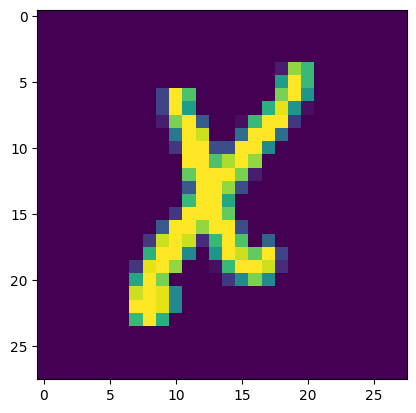

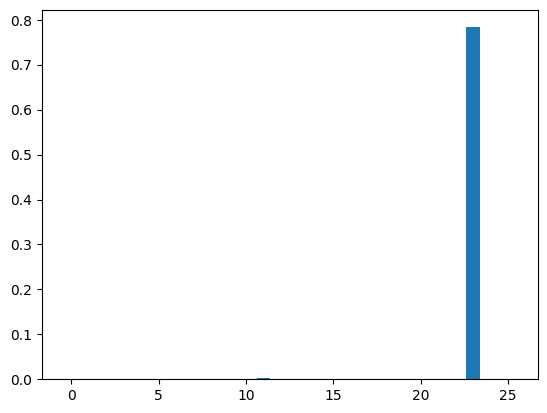

Predicted output is X with probability 78.32071270947326%
Actual output is X


In [20]:
# Display an image from the dataset
test = np.random.randint(len(X_test))
img = X_test[test, :].reshape(28, 28)
plt.imshow(img)
plt.show()
# Display the model's output for this image utilizing the classify function
out = classify(img)
plt.bar(np.linspace(0, 25, num = 26), out)
plt.show()
print(f"Predicted output is {chr(np.argmax(out)+65)} with probability {np.max(out)*100}%")
print(f"Actual output is {chr(Y_test[test]+65)}")

In [ ]:
\\\# Use np.save function to export the numpy arrays (Weights and bias matrices) after training and achieving a good accuracy